Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досфрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


Получение начальных цен:
AAPL: 151.60 USD (Дата: 2022-07-26)
MSFT: 251.90 USD (Дата: 2022-07-26)
GOOGL: 105.02 USD (Дата: 2022-07-26)
AMZN: 114.81 USD (Дата: 2022-07-26)
AAPL - 2022-10-25: 152.34 USD (Дата: 2022-10-25)
AAPL - 2023-01-25: 141.86 USD (Дата: 2023-01-25)
AAPL - 2023-04-25: 163.77 USD (Дата: 2023-04-25)
AAPL - 2023-07-25: 193.62 USD (Дата: 2023-07-25)
MSFT - 2022-10-25: 250.66 USD (Дата: 2022-10-25)
MSFT - 2023-01-25: 240.61 USD (Дата: 2023-01-25)
MSFT - 2023-04-25: 275.42 USD (Дата: 2023-04-25)
MSFT - 2023-07-25: 350.98 USD (Дата: 2023-07-25)
GOOGL - 2022-10-25: 104.48 USD (Дата: 2022-10-25)
GOOGL - 2023-01-25: 95.22 USD (Дата: 2023-01-25)
GOOGL - 2023-04-25: 103.85 USD (Дата: 2023-04-25)
GOOGL - 2023-07-25: 122.21 USD (Дата: 2023-07-25)
AMZN - 2022-10-25: 120.60 USD (Дата: 2022-10-25)
AMZN - 2023-01-25: 97.18 USD (Дата: 2023-01-25)
AMZN - 2023-04-25: 102.57 USD (Дата: 2023-04-25)
AMZN - 2023-07-25: 129.13 USD (Дата: 2023-07-25)

Цены на даты наблюдений:
                  

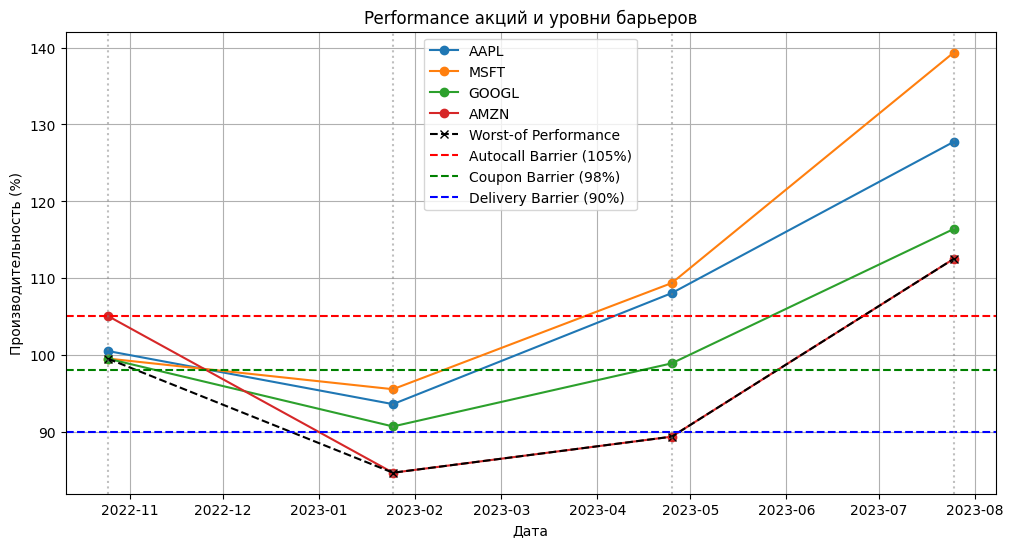

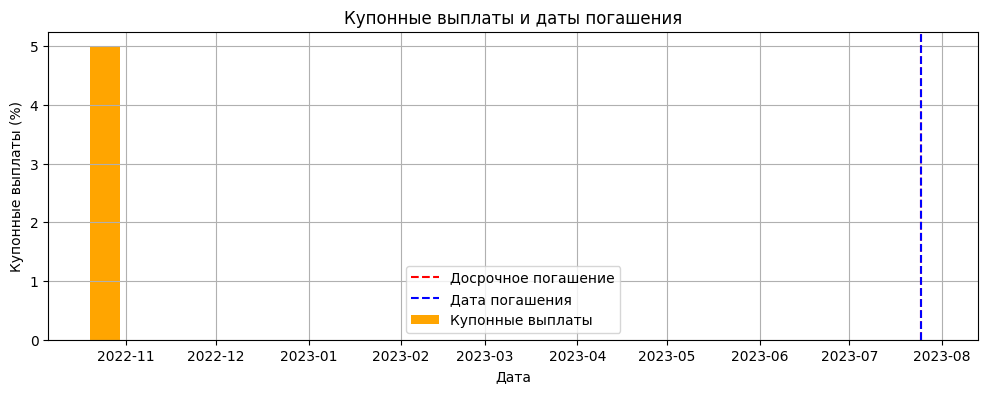

[Average-of] Выплата купона на дату 2022-10-25: 5.00%
[Average-of] Выплата купона на дату 2023-04-25: 5.00%
[Average-of] Опцион погашен досрочно на дату 2023-07-25. Выплата: 5,750,000.00 RUB

Альтернативный сценарий (Average-of Performance):
            Coupon_Paid_Avg  Accumulated_Coupons_Avg  Early_Redeemed_Avg  \
Date                                                                       
2022-10-25             True                     0.05               False   
2023-01-25            False                     0.05               False   
2023-04-25             True                     0.10               False   
2023-07-25             True                     0.00                True   

            Redemption_Value_Avg  
Date                              
2022-10-25                   0.0  
2023-01-25                   0.0  
2023-04-25                   0.0  
2023-07-25             5750000.0  

Общая выплата (Average-of): 5,750,000.00 RUB
Годовая доходность (Average-of): 15.04%


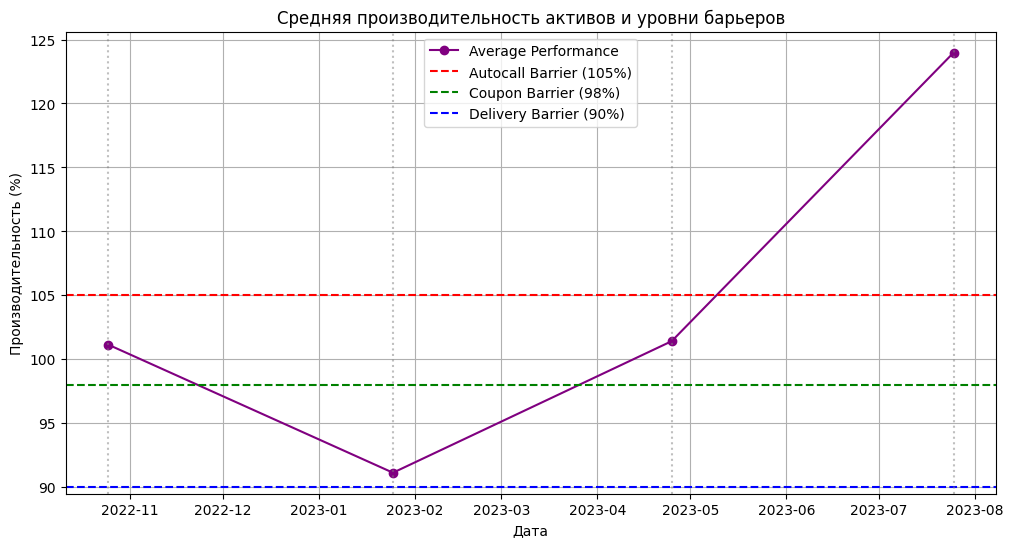

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Установка отображения всех колонок
pd.set_option('display.max_columns', None)

# -----------------------------
# Шаг 1: Определение тикеров и дат
# -----------------------------
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

initial_date = datetime(2022, 7, 26)

observation_dates = [
    datetime(2022, 10, 25),
    datetime(2023, 1, 25),
    datetime(2023, 4, 25),
    datetime(2023, 7, 25)
]

# -----------------------------
# Шаг 2: Функция для получения ближайшей доступной цены
# -----------------------------
def get_closest_close_price(ticker, target_date):
    """
    Возвращает цену закрытия на ближайшую доступную дату к target_date.
    Если target_date является выходным или праздником, ищет предыдущий рабочий день.
    """
    try:
        start = target_date - timedelta(days=7)
        end = target_date + timedelta(days=7)
        data = yf.download(ticker, start=start, end=end, progress=False)
        
        if data.empty:
            print(f"Данные для тикера {ticker} не найдены.")
            return None, None
        
        data = data.sort_index() 
        closest_date = min(data.index, key=lambda d: abs(d - target_date))
        close_price = data.loc[closest_date, 'Close']
        
        if isinstance(close_price, pd.Series):
            close_price = close_price.iloc[0]
        
        return closest_date, close_price
    except Exception as e:
        print(f"Ошибка при загрузке данных для тикера {ticker}: {e}")
        return None, None

# -----------------------------
# Шаг 3: Получение начальных цен
# -----------------------------
initial_prices = {}

print("Получение начальных цен:")

for ticker in tickers:
    actual_date, close_price = get_closest_close_price(ticker, initial_date)
    if close_price is not None:
        initial_prices[ticker] = close_price
        print(f"{ticker}: {close_price:.2f} USD (Дата: {actual_date.date()})")
    else:
        print(f"Не удалось получить начальную цену для {ticker}.")

# -----------------------------
# Шаг 4: Получение цен на даты наблюдений
# -----------------------------
prices_data = {'Date': observation_dates}

for ticker in tickers:
    prices = []
    for obs_date in observation_dates:
        actual_date, close_price = get_closest_close_price(ticker, obs_date)
        if close_price is not None:
            prices.append(close_price)
            print(f"{ticker} - {obs_date.date()}: {close_price:.2f} USD (Дата: {actual_date.date()})")
        else:
            prices.append(None)
            print(f"Не удалось получить цену для {ticker} на {obs_date.date()}.")
    prices_data[ticker] = prices

prices_df = pd.DataFrame(prices_data)
prices_df.set_index('Date', inplace=True)

print("\nЦены на даты наблюдений:")
print(prices_df)

# -----------------------------
# Шаг 5: Реализация опциона Autocallable
# -----------------------------

investment_amount = 5_000_000 
annual_coupon_rate = 0.20
quarterly_coupon = annual_coupon_rate / 4

autocall_barrier = 1.05    
coupon_barrier = 0.98      
delivery_barrier = 0.90   

assets = tickers

performance_df = prices_df.copy()
for asset in assets:
    performance_df[f'{asset}_Perf'] = performance_df[asset] / initial_prices[asset]

performance_df['Worst_Perf'] = performance_df[[f'{asset}_Perf' for asset in assets]].min(axis=1)

performance_df['Coupon_Paid'] = False
performance_df['Accumulated_Coupons'] = 0.0
performance_df['Early_Redeemed'] = False
performance_df['Redemption_Value'] = 0.0
performance_df['Redemption_Date'] = pd.NaT

accumulated_coupons = 0.0
early_redeemed = False

for idx, row in performance_df.iterrows():
    if early_redeemed:
        continue

    if row['Worst_Perf'] >= autocall_barrier:
        accumulated_coupons += quarterly_coupon
        performance_df.at[idx, 'Coupon_Paid'] = True
        performance_df.at[idx, 'Early_Redeemed'] = True
        performance_df.at[idx, 'Redemption_Value'] = investment_amount + (accumulated_coupons * investment_amount)
        performance_df.at[idx, 'Redemption_Date'] = idx
        early_redeemed = True
        print(f"Опцион погашен досрочно на дату {idx.date()}. Выплата: {investment_amount + (accumulated_coupons * investment_amount):,.2f} RUB")
        continue

    if row['Worst_Perf'] >= coupon_barrier:
        accumulated_coupons += quarterly_coupon
        performance_df.at[idx, 'Coupon_Paid'] = True
        print(f"Выплата купона на дату {idx.date()}: {quarterly_coupon * 100:.2f}%")
    
    performance_df.at[idx, 'Accumulated_Coupons'] = accumulated_coupons

# -----------------------------
# Определение final_date вне блока if-else
# -----------------------------
final_date = observation_dates[-1]

if not early_redeemed:
    final_perf = performance_df.loc[final_date, 'Worst_Perf']
    
    if final_perf >= delivery_barrier:
        redemption_value = investment_amount
        print(f"На дату погашения {final_date.date()} опцион погашен с выплатой номинала: {investment_amount:,.2f} RUB")
    else:
        worst_asset_perf = performance_df.loc[final_date, [f'{asset}_Perf' for asset in assets]]
        worst_asset = worst_asset_perf.idxmin().replace('_Perf', '')
        worst_perf = performance_df.loc[final_date, 'Worst_Perf']
        redemption_value = investment_amount * worst_perf
        print(f"На дату погашения {final_date.date()} опцион не погашен полностью. Выплата: {redemption_value:,.2f} RUB (Худший актив: {worst_asset})")
    
    performance_df.at[final_date, 'Redemption_Value'] = redemption_value
    performance_df.at[final_date, 'Redemption_Date'] = final_date

# -----------------------------
# Шаг 6: Расчет общей выплаты и доходности
# -----------------------------
if early_redeemed:
    total_payout = performance_df.loc[performance_df['Early_Redeemed'], 'Redemption_Value'].iloc[0]
    redemption_date = performance_df.loc[performance_df['Early_Redeemed'], 'Redemption_Date'].iloc[0]
    holding_period = (redemption_date - initial_date).days / 365
else:
    total_payout = performance_df.loc[final_date, 'Redemption_Value'] + (performance_df.loc[final_date, 'Accumulated_Coupons'] * investment_amount)
    holding_period = (final_date - initial_date).days / 365

annualized_yield = ((total_payout / investment_amount) ** (1 / holding_period)) - 1

print("\nРезультаты опциона Autocallable:")
print(performance_df[['Coupon_Paid', 'Accumulated_Coupons', 'Early_Redeemed', 'Redemption_Value']])
print(f"\nОбщая выплата: {total_payout:,.2f} RUB")
print(f"Годовая доходность: {annualized_yield * 100:.2f}%")

if early_redeemed:
    print(f"Опцион был погашен досрочно на дату {redemption_date.date()}.")
else:
    print("Опцион не был погашен досрочно.")
    if redemption_value == investment_amount:
        print("На дату погашения возвращена номинальная сумма.")
    else:
        print("На дату погашения произошел 'эффект поставки'.")

# -----------------------------
# Шаг 7: Визуализация результатов
# -----------------------------
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(performance_df.index, performance_df[f'{asset}_Perf'] * 100, marker='o', label=asset)

plt.plot(performance_df.index, performance_df['Worst_Perf'] * 100, marker='x', linestyle='--', color='k', label='Worst-of Performance')

plt.axhline(y=autocall_barrier * 100, color='r', linestyle='--', label='Autocall Barrier (105%)')
plt.axhline(y=coupon_barrier * 100, color='g', linestyle='--', label='Coupon Barrier (98%)')
plt.axhline(y=delivery_barrier * 100, color='b', linestyle='--', label='Delivery Barrier (90%)')

for date in observation_dates:
    plt.axvline(x=date, color='gray', linestyle=':', alpha=0.5)

plt.title('Performance акций и уровни барьеров')
plt.xlabel('Дата')
plt.ylabel('Производительность (%)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
coupon_payments = performance_df[performance_df['Coupon_Paid']]['Accumulated_Coupons'] * 100  # в процентах от номинала
plt.bar(performance_df[performance_df['Coupon_Paid']].index, coupon_payments, width=10, color='orange', label='Купонные выплаты')

if early_redeemed:
    plt.axvline(x=redemption_date, color='red', linestyle='--', label='Досрочное погашение')

plt.axvline(x=final_date, color='blue', linestyle='--', label='Дата погашения')

plt.title('Купонные выплаты и даты погашения')
plt.xlabel('Дата')
plt.ylabel('Купонные выплаты (%)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Шаг 8: Анализ влияния уровней барьеров
# -----------------------------
# Для упрощения примера будем изменять только барьер отзыва и смотреть на изменение доходности

# Здесь можно реализовать дополнительный анализ, изменяя значения барьеров и наблюдая за результатами.
# В данном примере этот шаг не реализован полностью.

# -----------------------------
# Шаг 9: Метод Average-of Performance
# -----------------------------
performance_df['Average_Perf'] = performance_df[[f'{asset}_Perf' for asset in assets]].mean(axis=1)

performance_df['Coupon_Paid_Avg'] = False
performance_df['Accumulated_Coupons_Avg'] = 0.0
performance_df['Early_Redeemed_Avg'] = False
performance_df['Redemption_Value_Avg'] = 0.0

accumulated_coupons_avg = 0.0
early_redeemed_avg = False

for idx, row in performance_df.iterrows():
    if early_redeemed_avg:
        continue

    if row['Average_Perf'] >= autocall_barrier:
        accumulated_coupons_avg += quarterly_coupon
        performance_df.at[idx, 'Coupon_Paid_Avg'] = True
        performance_df.at[idx, 'Early_Redeemed_Avg'] = True
        performance_df.at[idx, 'Redemption_Value_Avg'] = investment_amount + (accumulated_coupons_avg * investment_amount)
        early_redeemed_avg = True
        print(f"[Average-of] Опцион погашен досрочно на дату {idx.date()}. Выплата: {investment_amount + (accumulated_coupons_avg * investment_amount):,.2f} RUB")
        continue

    if row['Average_Perf'] >= coupon_barrier:
        accumulated_coupons_avg += quarterly_coupon
        performance_df.at[idx, 'Coupon_Paid_Avg'] = True
        print(f"[Average-of] Выплата купона на дату {idx.date()}: {quarterly_coupon * 100:.2f}%")
    
    performance_df.at[idx, 'Accumulated_Coupons_Avg'] = accumulated_coupons_avg

if not early_redeemed_avg:
    final_avg_perf = performance_df.loc[final_date, 'Average_Perf']
    
    if final_avg_perf >= delivery_barrier:
        redemption_value_avg = investment_amount
        print(f"[Average-of] На дату погашения {final_date.date()} опцион погашен с выплатой номинала: {investment_amount:,.2f} RUB")
    else:
        redemption_value_avg = investment_amount * final_avg_perf
        print(f"[Average-of] На дату погашения {final_date.date()} опцион не погашен полностью. Выплата: {redemption_value_avg:,.2f} RUB")
    
    performance_df.at[final_date, 'Redemption_Value_Avg'] = redemption_value_avg

if early_redeemed_avg:
    total_payout_avg = investment_amount + (accumulated_coupons_avg * investment_amount)
    redemption_date_avg = final_date  # В данном примере нет досрочного погашения для average-of
    holding_period_avg = (redemption_date_avg - initial_date).days / 365
else:
    total_payout_avg = redemption_value_avg + (performance_df.loc[final_date, 'Accumulated_Coupons_Avg'] * investment_amount)
    holding_period_avg = (final_date - initial_date).days / 365

annualized_yield_avg = ((total_payout_avg / investment_amount) ** (1 / holding_period_avg)) - 1

print("\nАльтернативный сценарий (Average-of Performance):")
print(performance_df[['Coupon_Paid_Avg', 'Accumulated_Coupons_Avg', 'Early_Redeemed_Avg', 'Redemption_Value_Avg']])
print(f"\nОбщая выплата (Average-of): {total_payout_avg:,.2f} RUB")
print(f"Годовая доходность (Average-of): {annualized_yield_avg * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(performance_df.index, performance_df['Average_Perf'] * 100, marker='o', label='Average Performance', color='purple')

plt.axhline(y=autocall_barrier * 100, color='r', linestyle='--', label='Autocall Barrier (105%)')
plt.axhline(y=coupon_barrier * 100, color='g', linestyle='--', label='Coupon Barrier (98%)')
plt.axhline(y=delivery_barrier * 100, color='b', linestyle='--', label='Delivery Barrier (90%)')

for date in observation_dates:
    plt.axvline(x=date, color='gray', linestyle=':', alpha=0.5)

plt.title('Средняя производительность активов и уровни барьеров')
plt.xlabel('Дата')
plt.ylabel('Производительность (%)')
plt.legend()
plt.grid(True)
plt.show()
